In [127]:
#Author: DP Aguirre
import numpy as np
import tensorflow as tf
import pandas as pd
import matplot as plt
import re #import regular expression library
from datetime import datetime

In [154]:
df1 = pd.read_csv("AAL1.csv")#, encoding='windows-1250', header=None)
df1.columns = ['Title', 'Date']
fechas = df1['Date']

newDateList=[]
for dateOfArticles in df1['Date']:
    match = re.search(r'\w{3}\s\d{1,2}\,\d{4}', dateOfArticles)
    
    if re.search(r'\w{3}\s\d{1,2}\,\s\d{4}',match[0]):
        fulldate = match[0]
    else:
        fulldate = match[0] 
       # print(match[0])
       # print(fulldate)
    
    newDate = datetime.strptime(fulldate,'%b %d,%Y').date()
    newDateList.append(newDate)

if(len(newDateList) != df1.shape[0]):
    print("Error: Rows don't match")
else:
    df1['New Date'] = newDateList # add the list to our original dataframe

df1

,Title,Date,New Date
0,Warren Buffett just made this group of traders...,"May 05,2020",2020-05-05
1,Here's How Bad United Airlines Job Cuts Could ...,"May 05,2020",2020-05-05
2,Why Buffett Was Wrong To Dump Airlines,"May 06,2020",2020-05-06
3,Who’s In? Who’s Out? Walmart & Twitter Dropped...,"May 06,2020",2020-05-06
4,UPDATE 2-United Airlines to raise $2.25 bln in...,"May 06,2020",2020-05-06
...,...,...,...
60,"UPDATE 2-Edging closer to bailout, Lufthansa a...","May 29,2020",2020-05-29
61,These areas of the economy ‘will not come back...,"May 29,2020",2020-05-29
62,Week In Review: How Trump's Policies Moved Sto...,"May 30,2020",2020-05-30
63,UPDATE 3-Lufthansa accepts tweaked demands by ...,"May 30,2020",2020-05-30


In [216]:
#sentiment analysis and score index
#traning data: historical financial headlines
#1 extremely positive, 0 neutra and -1 extremely negative
# VADER = "Valence Aware Dictionaly and sentiment Reasoner"

#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
#Sentiment Analysis of Social Media Text. Eighth International Conference on
#Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
#"""


import nltk.data
from nltk.util import pairwise
nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
    'Warren Buffet': -10
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

results = []

for headline in df1['Title']:
    #sentiment_score = SIA().polarity_scores(headline)
    sentiment_score = vader.polarity_scores(headline)
    sentiment_score['headlines'] = headline
    print(sentiment_score)
    results.append(sentiment_score)
results

## Concatenae the list to the original dataframe
#Two-dimensional, size-mutable, potentially heterogeneous tabular data.
df1['Score'] = pd.DataFrame(results)['compound']
df1


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headlines': 'Warren Buffett just made this group of traders almost $200 million'}
{'neg': 0.345, 'neu': 0.485, 'pos': 0.17, 'compound': -0.4404, 'headlines': "Here's How Bad United Airlines Job Cuts Could Be In October"}
{'neg': 0.533, 'neu': 0.467, 'pos': 0.0, 'compound': -0.6908, 'headlines': 'Why Buffett Was Wrong To Dump Airlines'}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headlines': 'Who’s In? Who’s Out? Walmart & Twitter Dropped from the S&P 500 ESG Index, Among Other Major Changes'}
{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'compound': -0.2732, 'headlines': 'UPDATE 2-United Airlines to raise $2.25 bln in bonds, rolls back plan to cut work hours'}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headlines': 'Is Delta Air Lines Stock a Buy?'}
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.4767, 'headlines': 'Airline stocks snap losing streak as JetBlue deems demand has already bottomed'}
{'neg': 0.0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/paulina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Date,New Date,Score
0,Warren Buffett just made this group of traders...,"May 05,2020",2020-05-05,0.0000
1,Here's How Bad United Airlines Job Cuts Could ...,"May 05,2020",2020-05-05,-0.4404
2,Why Buffett Was Wrong To Dump Airlines,"May 06,2020",2020-05-06,-0.6908
3,Who’s In? Who’s Out? Walmart & Twitter Dropped...,"May 06,2020",2020-05-06,0.0000
4,UPDATE 2-United Airlines to raise $2.25 bln in...,"May 06,2020",2020-05-06,-0.2732
...,...,...,...,...
60,"UPDATE 2-Edging closer to bailout, Lufthansa a...","May 29,2020",2020-05-29,0.2263
61,These areas of the economy ‘will not come back...,"May 29,2020",2020-05-29,0.0000
62,Week In Review: How Trump's Policies Moved Sto...,"May 30,2020",2020-05-30,0.0000
63,UPDATE 3-Lufthansa accepts tweaked demands by ...,"May 30,2020",2020-05-30,0.2263


In [217]:
##look for some predictive value of the of the sentiment score
#compare lagged score against daily returns
#sum
df2 = df1.groupby(['New Date']).sum()
df2

,Score
New Date,
2020-05-05,-0.4404
2020-05-06,-0.9640
2020-05-07,-0.1807
2020-05-08,-0.0595
2020-05-09,-0.4019
2020-05-11,0.2500
2020-05-12,-0.4549
2020-05-13,0.4939
2020-05-14,-0.1033


In [218]:
#getting the opening and closing prices
Prices = pd.read_csv("historical.csv")

#type(Prices['Date'][1])
#converting the str to data
Prices['Date'] = Prices['Date'].astype('datetime64[ns]')
#type(Prices['Date'][1])
Prices

,Symbol,Date,Open,High,Low,Close,Volume,Change,% Change
0,AAL,2020-05-04,9.41,10.17,9.15,9.82,125390430,-0.82,-7.71%
1,AAL,2020-05-05,10.26,10.38,9.50,9.51,86781119,-0.31,-3.16%
2,AAL,2020-05-06,9.58,9.73,9.09,9.25,68907137,-0.26,-2.73%
3,AAL,2020-05-07,9.30,9.80,9.29,9.54,61728337,0.29,3.14%
4,AAL,2020-05-08,9.78,10.15,9.68,10.14,59649700,0.60,6.29%
5,AAL,2020-05-11,9.92,10.25,9.59,10.10,48571591,-0.04,-0.39%
6,AAL,2020-05-12,10.01,10.20,9.60,9.65,46761378,-0.45,-4.46%
7,AAL,2020-05-13,9.52,9.53,8.83,9.11,68671350,-0.54,-5.60%
8,AAL,2020-05-14,8.77,9.19,8.25,9.15,72247094,0.04,0.44%
9,AAL,2020-05-15,8.85,9.36,8.76,9.04,39560500,-0.11,-1.20%


In [219]:
Prices2 = Prices.drop(['Symbol','Open', 'High', 'Low', 'Volume', 'Change', '% Change'], axis=1)
Prices2.set_index('Date',inplace=True)
Prices2

,Close
Date,
2020-05-04,9.82
2020-05-05,9.51
2020-05-06,9.25
2020-05-07,9.54
2020-05-08,10.14
2020-05-11,10.10
2020-05-12,9.65
2020-05-13,9.11
2020-05-14,9.15


In [220]:
#calculate daily returns
Prices2['Returns'] = Prices2['Close']/Prices2['Close'].shift(1) - 1 
Prices2

,Close,Returns
Date,,
2020-05-04,9.82,NaN
2020-05-05,9.51,-0.031568
2020-05-06,9.25,-0.027340
2020-05-07,9.54,0.031351
2020-05-08,10.14,0.062893
2020-05-11,10.10,-0.003945
2020-05-12,9.65,-0.044554
2020-05-13,9.11,-0.055959
2020-05-14,9.15,0.004391


In [221]:
#Analysis for finding relationships.
#one-day lagged sentiment score allows us to compare today's article headlines to tomorrow's stock returns
#Score(1) is the lagged sentiment score
df2['Score(1)'] = df2.shift(1)
Prices2
df2
# Older date score vs future returns


,Score,Score(1)
New Date,,
2020-05-05,-0.4404,NaN
2020-05-06,-0.9640,-0.4404
2020-05-07,-0.1807,-0.9640
2020-05-08,-0.0595,-0.1807
2020-05-09,-0.4019,-0.0595
2020-05-11,0.2500,-0.4019
2020-05-12,-0.4549,0.2500
2020-05-13,0.4939,-0.4549
2020-05-14,-0.1033,0.4939


In [222]:
#complicated version of Excel, create new dateframe that uses returns as reference and pull the appropiate lagged sentiment score for it
Prices3 = pd.merge(Prices2[['Returns']], df2[['Score(1)']], left_index=True, right_index=True, how='left')
#Score of NAN is 0
Prices3.fillna(0,inplace=True)
Prices3

,Returns,Score(1)
Date,,
2020-05-04,0.000000,0.0000
2020-05-05,-0.031568,0.0000
2020-05-06,-0.027340,-0.4404
2020-05-07,0.031351,-0.9640
2020-05-08,0.062893,-0.1807
2020-05-11,-0.003945,-0.4019
2020-05-12,-0.044554,0.2500
2020-05-13,-0.055959,-0.4549
2020-05-14,0.004391,0.4939


In [223]:
#Remove data that has not important sentiment scorer
ReturnScore2 = Prices3[(Prices3['Score(1)']>0.5) | (Prices3['Score(1)']<-0.5)]

In [224]:
ReturnScore2
#problem I see here, change the lexicon so there are stronger scores
#in the headlines and we dont loose so much data

,Returns,Score(1)
Date,,
2020-05-07,0.031351,-0.9640
2020-05-21,0.006079,0.8779
2020-05-22,-0.023162,-0.7817
2020-05-27,0.086176,0.6478
2020-05-28,-0.092562,0.5600


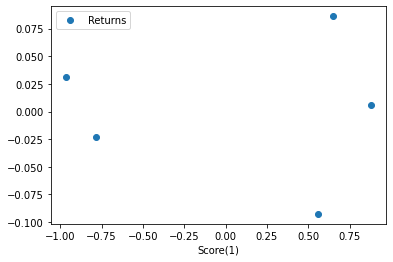

In [225]:
ReturnScore2.plot(x="Score(1)", y="Returns", style='o')
#it is quite bad, you want something
#The normal distribution cannot replicate tail dependence
#The t3 distribution can produce joint large gains/losses but in a symmetric way

In [200]:
ReturnScore2['Returns'].corr(ReturnScore2['Score(1)'])
#inverse relationship.

0.12992108693519494

High Impact Dates

Don’t trade on days where other variables have huge impact. 

Accuracy of our sentiment analyser
The accuracy of the VADER sentiment analyser is nowhere near perfect. Just by eyeballing the output, you should be able to see this. 
That said, if you want to improve on this, the solution will be to build your own sentiment analyser by training it on the type of data you are testing on.

Complement headlines with social media!!